### Logistic Model for Binary Classification

A retail banking institution is going to float a stock trading facility for their existing customer. Since this kind of facitlity is nothing new , company knows that they will have to incetivise their customers for adopting their offerings. One way to incetiwise is to offer discounts on the commision for trading transactions.

One issue with that is that only about 10% of the customers do enought trades for earnings after discounts to be profitable. Company wants to figure out, which are those 10% customer so that it can selectively offer them discount. there is no magic way to figure that out. So company rolled out this service to about 10000+ of their customers and observed their trading behaviour for 6 months and after that they labelled them into two revenue.grids 1 and 2.
using this data, now they want us to build a classification model which can be used to classify their remaining customers into these revenue grids.



Scikit Learn's Logistic Regression has penalties called l1 and l2, where l1 is lasso and l2 is ridge. The parameter C determines the strength of the penalty in an inverse manner; smaller C means stronger penalty. We used l1 penalty with C=1. You can try using l2 penalty and finding the optimal C using cross-validation for both penalties. The best hyperparameter value can be found using the auc obtained from the roc_auc_score function, where a higher auc means a better model. If you need more background, please refer to the theoretical material. Let's get started with building our model!

In [1]:
#import the libraries:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
#read the data_file:
data_file=r'Existing Base.csv'

In [3]:
eb=pd.read_csv(data_file)

In [4]:
eb.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [5]:
eb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

Here, We Need to convert Categorical data to Numeric

#### Examine: children column

In [6]:
pd.DataFrame(eb['children'])

,children
0,Zero
1,Zero
2,Zero
3,Zero
4,Zero
...,...
10150,1
10151,Zero
10152,2
10153,Zero


In [7]:
pd.DataFrame(eb['children'].value_counts())

,children
Zero,6208
1,1848
2,1607
3,473
4+,19


In [8]:
#replace "Zero" To Numeric '0'
eb['children']=eb['children'].replace('Zero','0')

In [9]:
pd.DataFrame(eb['children'].value_counts())

,children
0,6208
1,1848
2,1607
3,473
4+,19


In [10]:
eb['children']=eb['children'].replace('4+','4')

In [11]:
eb['children'].value_counts()

0    6208
1    1848
2    1607
3     473
4      19
Name: children, dtype: int64

##### Now ,we have to dtype: object to Numeric  

The first argument to `pd.to_numeric()` is the column of the DataFrame to convert, which in this case is `eb["children"]`. The `errors` parameter is set to "coerce", which means that any non-numeric values in the column will be converted to NaN (Not a Number) values. 

After the conversion, the modified " children" column will contain only numeric values and NaNs. This can be useful for certain data analysis tasks, such as computing summary statistics or building regression models.


In [12]:
eb["children"]=pd.to_numeric(eb["children"],errors="coerce")

#### Examine: status column

In [13]:
pd.DataFrame(eb['status'])

,status
0,Partner
1,Single/Never Married
2,Single/Never Married
3,Single/Never Married
4,Partner
...,...
10150,Partner
10151,Partner
10152,Partner
10153,Partner


In [14]:
eb['status'].unique()

array(['Partner', 'Single/Never Married', 'Widowed', 'Divorced/Separated',
       'Unknown'], dtype=object)

In [15]:
eb['status'].value_counts()

Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

##### Method done by Sir :
eb["st_partner"]=np.where(bd["status"]=="Partner",1,0)

eb["st_singleNm"]=np.where(bd["status"]=="Single/Never Married",1,0)

eb["st_divSep"]=np.where(bd["status"]=="Divorced/Separated",1,eb

In [16]:
# My Method:
status_dummies= pd.get_dummies(eb['status'],prefix='st')

In [17]:
status_dummies

,st_Divorced/Separated,st_Partner,st_Single/Never Married,st_Unknown,st_Widowed
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10150,0,1,0,0,0
10151,0,1,0,0,0
10152,0,1,0,0,0
10153,0,1,0,0,0


##### Drop the column 'Unknown' and 'Widowed' Column 

In [18]:
status_dummies=status_dummies.drop(['st_Unknown','st_Widowed'],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\4000991292.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  status_dummies=status_dummies.drop(['st_Unknown','st_Widowed'],1)


In [19]:
status_dummies

,st_Divorced/Separated,st_Partner,st_Single/Never Married
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
10150,0,1,0
10151,0,1,0
10152,0,1,0
10153,0,1,0


###### So, We need to concat this dummies with original DataFrame

In [20]:
eb= pd.concat([eb,status_dummies],axis=1)

###### Drop the 'status' column and 'status_dummies' column

In [21]:
eb= eb.drop(['status'],1)
del status_dummies


C:\Users\prath\AppData\Local\Temp\ipykernel_31472\3790571050.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb= eb.drop(['status'],1)


##### Examine: occupation column

In [22]:
pd.DataFrame(eb['occupation'])

,occupation
0,Manual Worker
1,Retired
2,Professional
3,Professional
4,Business Manager
...,...
10150,Secretarial/Admin
10151,Manual Worker
10152,Housewife
10153,Other


In [23]:
pd.DataFrame(eb['occupation'].value_counts())

,occupation
Professional,2449
Retired,2206
Secretarial/Admin,1797
Housewife,1255
Business Manager,732
Unknown,567
Manual Worker,556
Other,537
Student,56


##### After Analysing 'Occupation' Col ,i didn't get anything hence i have to compare with our target column - ' Revenue Grid'

###### Examine : 'Revenue Grid' Column

In [24]:
pd.DataFrame(eb['Revenue Grid'])

,Revenue Grid
0,1
1,2
2,2
3,2
4,2
...,...
10150,2
10151,2
10152,2
10153,2


In [25]:
#Replace the value '1'=0 and '2'=1:

eb["reve_grid"]=np.where(eb["Revenue Grid"]==1,1,0)

Assuming that the "eb" dataframe has a "Revenue Grid" column and a "y" column, the code below assigns a new value to the "y" column based on the "Revenue Grid" column values using NumPy's "where()" function:

```
import numpy as np

bd["reve_grid"] = np.where(bd["Revenue Grid"] == 1, 1, 0)
```
This code will change the values in the "y" column to 1 for all rows where "Revenue Grid" is equal to 1, and to 0 for all rows where "Revenue Grid" is equal to 2. Note that this will modify the original "eb" dataframe.

In [26]:
pd.DataFrame(eb['reve_grid'])

,reve_grid
0,1
1,0
2,0
3,0
4,0
...,...
10150,0
10151,0
10152,0
10153,0


In [27]:
#Drop Revenue Grid Column:

eb=eb.drop(["Revenue Grid"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\1295014637.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["Revenue Grid"],1)


In [28]:
eb.head()

,REF_NO,children,age_band,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,...,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,st_Divorced/Separated,st_Partner,st_Single/Never Married,reve_grid
0,1,0,51-55,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,...,Female,Wales,74.67,18.66,32.32,89.43,0,1,0,1
1,2,0,55-60,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,...,Female,North West,20.19,0.00,4.33,22.78,0,0,1,0
2,3,0,26-30,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,...,Male,North,98.06,31.07,80.96,171.78,0,0,1,0
3,5,0,18-21,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,...,Female,West Midlands,4.10,14.15,17.57,-41.70,0,0,1,0
4,6,0,45-50,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,...,Female,Scotland,70.16,55.86,80.44,235.02,0,1,0,0


##### Now Focus on occupation Column :

In [29]:
#combine or groupby occupation column with reve_grid column

round(eb.groupby("occupation")["reve_grid"].mean(),2)

occupation
Business Manager     0.12
Housewife            0.09
Manual Worker        0.11
Other                0.11
Professional         0.12
Retired              0.10
Secretarial/Admin    0.11
Student              0.11
Unknown              0.11
Name: reve_grid, dtype: float64

In [30]:
for i in range (len(eb)):
    if eb["occupation"][i] in ["Manual Worker","Other","Secretarial/Admin","Student","Unknown"]:
        eb.loc[i,"occupation"]="occ_11"
    if eb["occupation"][i] in ["Business Manager","Professional"]:
        eb.loc[i,"occupation"]="occ_12"
    if eb["occupation"][i] in ["Retired"]:
        eb.loc[i,"occupation"]="occ_10"

#create dummies table for above:

occ_dummies=pd.get_dummies(eb["occupation"])


In [31]:
occ_dummies.head()

,Housewife,occ_10,occ_11,occ_12
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [32]:
#combine both DataFrames:
eb=pd.concat([eb,occ_dummies],axis=1)

In [33]:
#drop the unnecessary columns:

eb = eb.drop(["occupation", "Housewife"], axis=1)


##### Examine: age_band column

In [34]:
pd.DataFrame(eb["age_band"])

,age_band
0,51-55
1,55-60
2,26-30
3,18-21
4,45-50
...,...
10150,45-50
10151,45-50
10152,41-45
10153,51-55


In [35]:
pd.DataFrame(eb["age_band"].value_counts())

,age_band
45-50,1359
36-40,1134
41-45,1112
31-35,1061
51-55,1052
55-60,1047
26-30,927
61-65,881
65-70,598
22-25,456


##### By Analysing above data ,we have to comapre it with Target Column

In [36]:
round(eb.groupby("age_band")["reve_grid"].mean(),2)

age_band
18-21      0.17
22-25      0.11
26-30      0.11
31-35      0.11
36-40      0.13
41-45      0.11
45-50      0.10
51-55      0.10
55-60      0.11
61-65      0.09
65-70      0.10
71+        0.10
Unknown    0.05
Name: reve_grid, dtype: float64

In [37]:
#categorize them:

for i in range (len(eb)):
    if eb["age_band"][i] in ["22-25","26-30","31-35","41-45","55-60"]:
        eb.loc[i,"age_band"]="ageb_11"
    if eb["age_band"][i] in ["45-50","51-55","65-70","71+"]:
        eb.loc[i,"age_band"]="ageb_10"
    if eb["age_band"] [i] in ["18-21"]:
        eb.loc[i,"age_band"]="ageb_17"
    if eb["age_band"][i] in ["36-40"]:
        eb.loc[i,"age_band"]="ageb_13"
    if eb["age_band"][i] in ["61-65"]:
        eb.loc[i,"age_band"]="ageb_09"
    

In [38]:
#create a dummie column:
age_band_dummies= pd.get_dummies(eb["age_band"])

In [39]:
age_band_dummies

,Unknown,ageb_09,ageb_10,ageb_11,ageb_13,ageb_17
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0
...,...,...,...,...,...,...
10150,0,0,1,0,0,0
10151,0,0,1,0,0,0
10152,0,0,0,1,0,0
10153,0,0,1,0,0,0


In [40]:
#Drop the "Unknown" Column
age_band_dummies=age_band_dummies.drop(["Unknown"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\2270871020.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  age_band_dummies=age_band_dummies.drop(["Unknown"],1)


In [41]:
#Drop the "age_band" Column:
eb=eb.drop(["age_band"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\4253069281.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["age_band"],1)


In [42]:
#concat the Both tables:
eb=pd.concat([eb,age_band_dummies],axis=1)

##### Examine: occupation_partner Column


In [43]:
pd.DataFrame(eb["occupation_partner"].value_counts())

,occupation_partner
Unknown,2394
Professional,2051
Retired,1936
Manual Worker,1508
Business Manager,737
Secretarial/Admin,662
Housewife,527
Other,324
Student,16


In [44]:
round(eb.groupby("occupation_partner")["reve_grid"].mean(),2)

occupation_partner
Business Manager     0.11
Housewife            0.11
Manual Worker        0.11
Other                0.10
Professional         0.11
Retired              0.10
Secretarial/Admin    0.12
Student              0.12
Unknown              0.10
Name: reve_grid, dtype: float64

In [45]:
for i in range (len(eb)):
    if eb["occupation_partner"][i] in ["Business Manager","Housewife","Manual Worker","Professional"]:
        eb.loc[i,"occupation_partner"]="occ_p_11"
    if eb["occupation_partner"][i] in ["Secretarial/Admin","Student"]:
        eb.loc[i,"occupation_partner"]="occ_p_12"
    if eb["occupation_partner"][i] in ["Other","Unknown","Retired"]:
        eb.loc[i,"occupation_partner"]="occ_p_10"

In [46]:
occ_p_dummies= pd.get_dummies(eb["occupation_partner"])

In [47]:
occ_p_dummies

,occ_p_10,occ_p_11,occ_p_12
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
10150,0,1,0
10151,0,1,0
10152,0,1,0
10153,0,1,0


In [48]:
#concat both columns:
eb=pd.concat([eb,occ_p_dummies],axis=1)

In [49]:
#drop the unnecessary columns:
eb=eb.drop(["occupation_partner"],axis=1)

##### Examine :home_status column


In [50]:
pd.DataFrame(eb["home_status"].value_counts())

,home_status
Own Home,9413
Rent from Council/HA,322
Rent Privately,261
Live in Parental Hom,109
Unclassified,50


Above Column shows that "Own Home" have more counts than other 

In [51]:
eb["hs_own"]=np.where(eb["home_status"]=="Own Home",1,0)

In [52]:
eb=eb.drop(["home_status"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\855914676.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["home_status"],1)


In [53]:
eb.head()

,REF_NO,children,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,...,occ_12,ageb_09,ageb_10,ageb_11,ageb_13,ageb_17,occ_p_10,occ_p_11,occ_p_12,hs_own
0,1,0,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,...,0,0,1,0,0,0,0,0,1,1
1,2,0,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,...,0,0,0,1,0,0,1,0,0,1
2,3,0,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,...,1,0,0,1,0,0,1,0,0,1
3,5,0,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,...,1,0,0,0,0,1,0,1,0,1
4,6,0,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,...,1,0,1,0,0,0,1,0,0,1


##### Examine: self_employed


In [54]:
pd.DataFrame(eb["self_employed"].value_counts())

,self_employed
No,9436
Yes,719


In [55]:
eb["self_emp_y"]=np.where(eb["self_employed"]=="Yes",1,0)

In [56]:
#Drop the Column:
eb=eb.drop(["self_employed"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\589257500.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["self_employed"],1)


##### Examine: self_employed_partner Column

In [57]:
pd.DataFrame(eb["self_employed_partner"])

,self_employed_partner
0,No
1,No
2,No
3,No
4,No
...,...
10150,No
10151,No
10152,No
10153,Yes


In [58]:
pd.DataFrame(eb["self_employed_partner"].value_counts())

,self_employed_partner
No,9026
Yes,1129


In [59]:
eb["selemp_p_y"]=np.where(eb["self_employed_partner"]=="Yes",1,0)

In [60]:
#Drop Original Column: "self_employed_partner"
del eb["self_employed_partner"]

In [61]:
eb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  int64  
 2   family_income                    10155 non-null  object 
 3   year_last_moved                  10155 non-null  int64  
 4   TVarea                           10155 non-null  object 
 5   post_code                        10155 non-null  object 
 6   post_area                        10155 non-null  object 
 7   Average Credit Card Transaction  10155 non-null  float64
 8   Balance Transfer                 10155 non-null  float64
 9   Term Deposit                     10155 non-null  float64
 10  Life Insurance                   10155 non-null  float64
 11  Medical Insurance                10155 non-null  float64
 12  Average A/C Balanc

##### Examine: TVarea Column


In [62]:
pd.DataFrame(eb["TVarea"].value_counts())

,TVarea
Central,1618
Carlton,1541
Meridian,1226
Yorkshire,1042
Granada,1039
HTV,845
Anglia,751
Tyne Tees,536
Scottish TV,520
TV South West,363


In [63]:
round(eb.groupby("TVarea")["reve_grid"].mean(),2)

TVarea
Anglia           0.11
Border           0.14
Carlton          0.11
Central          0.11
Grampian         0.10
Granada          0.12
HTV              0.10
Meridian         0.09
Scottish TV      0.11
TV South West    0.09
Tyne Tees        0.09
Ulster           0.12
Unknown          0.12
Yorkshire        0.12
Name: reve_grid, dtype: float64

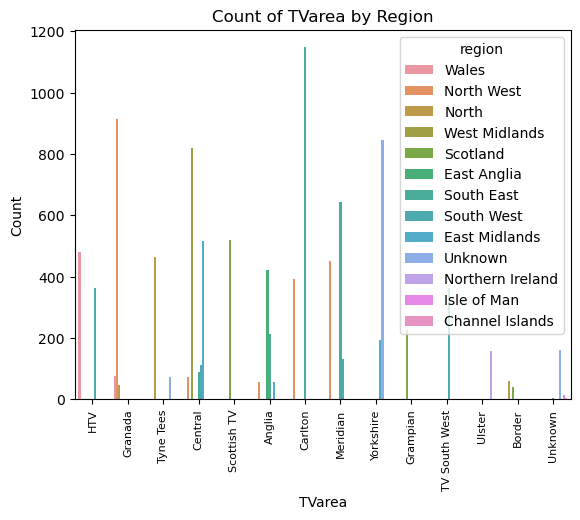

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
ax = sns.countplot(data=eb, x='TVarea', hue='region')

# Set the titles and axis labels
ax.set_title('Count of TVarea by Region')
ax.set_xlabel('TVarea')
ax.set_ylabel('Count')

# Rotate x-axis labels by 90 degrees
ax.tick_params(axis="x", labelrotation=90)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)

# Display the plot
plt.show()


##### In this "TVarea" Column : I can not see much information after analysing hence drop the column "TVarea"

In [65]:
eb=eb.drop(["TVarea"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\2849087252.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["TVarea"],1)


##### Examine:post_code , post_area:

 We have "region" column so we don't have these 2 column so we should drop the columns

In [66]:
eb=eb.drop(["post_code","post_area"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\252654898.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["post_code","post_area"],1)


##### Examine: gender column

In [67]:
pd.DataFrame(eb["gender"].value_counts())

,gender
Female,7634
Male,2486
Unknown,35


Here , Count  of Female is more ,so we can gave female as 1 value

In [68]:
eb["gender_f"]=np.where(eb["gender"]=="Female",1,0)

In [69]:
#Drop the original column:
eb=eb.drop(["gender"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\927674385.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["gender"],1)


##### Examine: region column

In [70]:
pd.DataFrame(eb["region"].value_counts())

,region
South East,2100
North West,1896
Unknown,1080
South West,971
West Midlands,820
Scotland,787
East Midlands,771
North,571
Wales,556
East Anglia,423


we can comapre "region" column with "reve_grid" column to know in which region Revenue_Grid is 1 and 2

In [71]:
round(eb.groupby("region")["reve_grid"].mean(),2)

region
Channel Islands     0.20
East Anglia         0.13
East Midlands       0.10
Isle of Man         0.00
North               0.10
North West          0.11
Northern Ireland    0.12
Scotland            0.11
South East          0.10
South West          0.09
Unknown             0.12
Wales               0.11
West Midlands       0.11
Name: reve_grid, dtype: float64

In [72]:
for i in range (len(eb)):
    if eb["region"][i] in ["North West","Scotland","Wales","West Midlands"]:
        eb.loc[i,"region"]="reg_11"
    if eb["region"][i] in ["Northern Ireland","Unknown"]:
        eb.loc[i,"region"]="reg_12"
    if eb["region"][i] in ["Channel Islands"]:
        eb.loc[i,"region"]="reg_20"
    if eb["region"][i] in ["East Anglia"]:
        eb.loc[i,"region"]="reg_13"
    if eb["region"][i] in ["North"]:
        eb.loc[i,"region"]="reg_10"
        

In [73]:
region_dummies= pd.get_dummies(eb["region"])

In [74]:
region_dummies

,East Midlands,Isle of Man,South East,South West,reg_10,reg_11,reg_12,reg_13,reg_20
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
10150,0,0,1,0,0,0,0,0,0
10151,0,0,1,0,0,0,0,0,0
10152,0,0,1,0,0,0,0,0,0
10153,0,0,1,0,0,0,0,0,0


In [75]:
#Drop unnecessary columns:
region_dummies=region_dummies.drop(["East Midlands","Isle of Man","South East","South West"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\3138537519.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  region_dummies=region_dummies.drop(["East Midlands","Isle of Man","South East","South West"],1)


In [76]:
#concat the region_dummies DataFrame with eb DataFrame:
eb=pd.concat([eb,region_dummies],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\752340320.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  eb=pd.concat([eb,region_dummies],1)


In [77]:
eb.head()

,REF_NO,children,family_income,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,...,occ_p_12,hs_own,self_emp_y,selemp_p_y,gender_f,reg_10,reg_11,reg_12,reg_13,reg_20
0,1,0,"<17,500, >=15,000",1972,148.44,142.95,0.00,81.96,0.00,29.99,...,1,1,0,0,1,0,1,0,0,0
1,2,0,"<27,500, >=25,000",1998,0.00,74.98,0.00,25.99,0.00,0.00,...,0,1,0,0,1,0,1,0,0,0
2,3,0,"<30,000, >=27,500",1996,0.00,166.44,20.99,291.37,11.48,166.94,...,0,1,1,0,0,1,0,0,0,0
3,5,0,"<15,000, >=12,500",1997,0.00,0.00,0.00,20.49,0.00,39.46,...,0,1,0,0,1,0,1,0,0,0
4,6,0,"<30,000, >=27,500",1995,73.45,57.96,0.00,177.42,41.95,39.47,...,0,1,0,0,1,0,1,0,0,0


In [78]:
#Now Drop the "region" column:
eb=eb.drop(["region"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\2159805679.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["region"],1)


In [79]:
eb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  int64  
 2   family_income                    10155 non-null  object 
 3   year_last_moved                  10155 non-null  int64  
 4   Average Credit Card Transaction  10155 non-null  float64
 5   Balance Transfer                 10155 non-null  float64
 6   Term Deposit                     10155 non-null  float64
 7   Life Insurance                   10155 non-null  float64
 8   Medical Insurance                10155 non-null  float64
 9   Average A/C Balance              10155 non-null  float64
 10  Personal Loan                    10155 non-null  float64
 11  Investment in Mutual Fund        10155 non-null  float64
 12  Investment Tax Sav

##### Examine:family_income Column:

In [80]:
pd.DataFrame(eb["family_income"])

,family_income
0,"<17,500, >=15,000"
1,"<27,500, >=25,000"
2,"<30,000, >=27,500"
3,"<15,000, >=12,500"
4,"<30,000, >=27,500"
...,...
10150,"<30,000, >=27,500"
10151,"<25,000, >=22,500"
10152,">=35,000"
10153,"<10,000, >= 8,000"


In [81]:
pd.DataFrame(eb["family_income"].value_counts())

,family_income
">=35,000",2517
"<27,500, >=25,000",1227
"<30,000, >=27,500",994
"<25,000, >=22,500",833
"<20,000, >=17,500",683
"<12,500, >=10,000",677
"<17,500, >=15,000",634
"<15,000, >=12,500",629
"<22,500, >=20,000",590
"<10,000, >= 8,000",563


In [82]:
round(eb.groupby("family_income")["reve_grid"].mean(),4)

family_income
< 4,000              0.0755
< 8,000, >= 4,000    0.0796
<10,000, >= 8,000    0.1066
<12,500, >=10,000    0.1019
<15,000, >=12,500    0.1113
<17,500, >=15,000    0.1230
<20,000, >=17,500    0.1113
<22,500, >=20,000    0.1186
<25,000, >=22,500    0.1032
<27,500, >=25,000    0.0970
<30,000, >=27,500    0.1157
>=35,000             0.1116
Unknown              0.0703
Name: reve_grid, dtype: float64

In [83]:
eb["fi"]=4 # by doing this , we have essentially clubbed <4000 and Unknown values . How?
eb.loc[eb["family_income"]=="< 8,000, >= 4,000","fi"]=6
eb.loc[eb["family_income"]=="<10,000, >= 8,000","fi"]=9
eb.loc[eb["family_income"]=="<12,500, >=10,000","fi"]=11.25
eb.loc[eb["family_income"]=="<15,000, >=12,500","fi"]=13.75
eb.loc[eb["family_income"]=="<17,500, >=15,000","fi"]=16.25
eb.loc[eb["family_income"]=="<20,000, >=17,500","fi"]=18.75
eb.loc[eb["family_income"]=="<22,500, >=20,000","fi"]=21.25
eb.loc[eb["family_income"]=="<25,000, >=22,500","fi"]=23.75
eb.loc[eb["family_income"]=="<27,500, >=25,000","fi"]=26.25
eb.loc[eb["family_income"]=="<30,000, >=27,500","fi"]=28.75
eb.loc[eb["family_income"]==">=35,000","fi"]=35
eb=eb.drop(["family_income"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\3940112956.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["family_income"],1)


In [84]:
eb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  int64  
 2   year_last_moved                  10155 non-null  int64  
 3   Average Credit Card Transaction  10155 non-null  float64
 4   Balance Transfer                 10155 non-null  float64
 5   Term Deposit                     10155 non-null  float64
 6   Life Insurance                   10155 non-null  float64
 7   Medical Insurance                10155 non-null  float64
 8   Average A/C Balance              10155 non-null  float64
 9   Personal Loan                    10155 non-null  float64
 10  Investment in Mutual Fund        10155 non-null  float64
 11  Investment Tax Saving Bond       10155 non-null  float64
 12  Home Loan         

Now that the entire data is of numeric type, lets beging our modelling process after removing nas from the data.

In [85]:
eb.shape

(10155, 43)

In [86]:
#all missing values in rows
# Drop rows with missing values
eb.dropna(axis=0,inplace=True)

In [87]:
eb.shape

(10155, 43)

In [88]:
#Drop unnecessary Columns:
eb=eb.drop(["REF_NO"],1)

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\1112259287.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  eb=eb.drop(["REF_NO"],1)


We now split our data into two random parts . One to build model on , Another to test its performance.
Option "random_state" is used to make our random operation reproducible.

In [89]:
# Splitting into Train and Test Sets
eb_train, eb_test= train_test_split(eb, test_size=0.2, random_state=42)

In [90]:
eb_test.shape

(2031, 42)

In [91]:
# Creating and training the logistic regression model
model = LogisticRegression()

In [92]:
x_train=eb_train.drop(['reve_grid'],1)
y_train=eb_train['reve_grid']
x_test=eb_train.drop(['reve_grid'],1)
y_test=eb_train['reve_grid']

C:\Users\prath\AppData\Local\Temp\ipykernel_31472\508885798.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=eb_train.drop(['reve_grid'],1)
C:\Users\prath\AppData\Local\Temp\ipykernel_31472\508885798.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=eb_train.drop(['reve_grid'],1)


In [93]:
#Now, We can fit our model:
model.fit(x_train, y_train)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
# Computing the accuracy:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9437469226981783


In [95]:
from sklearn.model_selection import cross_val_score

# Cross-validation
accuracy_scores = cross_val_score(model,x_test , y_test, cv=5)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Print accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy scores: [0.944      0.93784615 0.94030769 0.95015385 0.9341133 ]
Mean accuracy: 0.9412841985600607


C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Measuring Model Performance (Digits Dataset)
While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric.
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points)

In [96]:
# Use score method to get accuracy of model
score = model.score(x_test, y_test)
print(score)

0.9437469226981783


Confusion Matrix (Digits Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.

Method 1:

In [97]:
from sklearn import metrics
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[7135  129]
 [ 328  532]]


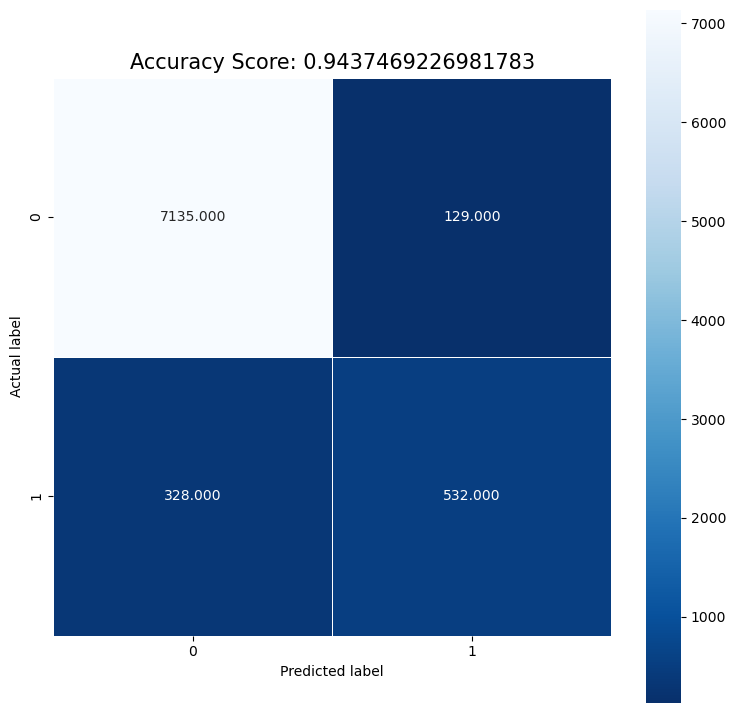

In [98]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [99]:
from sklearn.metrics import classification_report
target_names = ['Grid 1', 'Grid 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Grid 1       0.96      0.98      0.97      7264
      Grid 2       0.80      0.62      0.70       860

    accuracy                           0.94      8124
   macro avg       0.88      0.80      0.83      8124
weighted avg       0.94      0.94      0.94      8124



ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

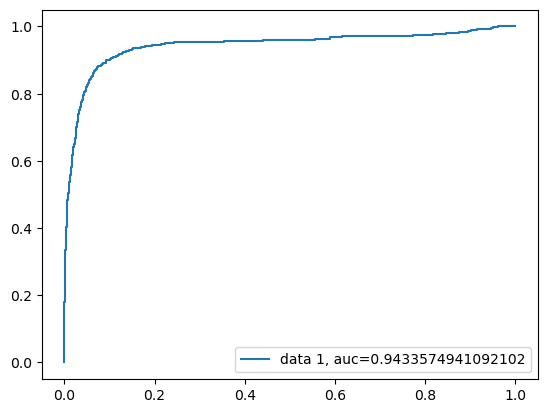

In [100]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [101]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
4802,0,0
7997,0,0
8585,0,0
9437,0,0
1739,0,0
...,...,...
5734,0,0
5191,0,0
5390,0,0
860,0,0


###### Using confusion matrix:
From the Scikit-learn metrics module, we import confusion_matrix. The confusion matrix is the number of correct and incorrect predictions column-wise, showing the following values:

True negatives(TN) in the upper-left position.

False negatives(FN) in the lower-left position.

False positives(FP) in the upper-right position.

True positives(TP) in the lower-right position.

In [102]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[7135,  129],
       [ 328,  532]], dtype=int64)

TN=7135
FN=328
FP=129
TP=532

Accuracy:
(TP+TN)/(TP+TN+FP+FN)

In [103]:
Accuracy = (532 + 7135)/(532 + 7135 + 129 + 328)
Accuracy


0.9437469226981783

In [104]:
# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9437469226981783

In [105]:
prob_score=pd.Series(list(zip(*model.predict_proba(x_train)))[1])
prob_score_test=pd.Series(list(zip(*model.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))

In [106]:
cutoffs=np.linspace(0.010,0.99,100)
def Fbeta_perf(beta,cutoffs,y_train,prob_score):
    FB_cut=[]
    for cutoff in cutoffs:
        predicted=pd.Series([0]*len(y_train))
        predicted[prob_score>cutoff]=1
        eb=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

        TP=len(eb[(eb["real"]==1) &(eb["predicted"]==1) ])
        FP=len(eb[(eb["real"]==0) &(eb["predicted"]==1) ])
        FN=len(eb[(eb["real"]==1) &(eb["predicted"]==0) ])
        P=TP+FN
        
        
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_cut.append(FB)

    cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

    FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

    prob_score_test=pd.Series(list(zip(*model.predict_proba(x_test)))[1])

    predicted_test=pd.Series([0]*len(y_test))
    predicted_test[prob_score_test>float(FB_cutoff)]=1

    eb_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

    k=pd.crosstab(eb_test['real'],eb_test["predicted"])
#     print('confusion matrix :\n \n ',k)
    TN=k.iloc[0,0]
    TP=k.iloc[1,1]
    FP=k.iloc[0,1]
    FN=k.iloc[1,0]
    P=TP+FN
    N=TN+FP
    print('For beta :',beta)
    print('Accuracy is :',(TP+TN)/(P+N))
    print('Sensitivity is :',(TP/P))
    print('Specificity is :',(TN/N))
    print('\n \n \n')

In [107]:
Fbeta_perf(0.5,cutoffs,y_train,prob_score)
Fbeta_perf(1,cutoffs,y_train,prob_score)
Fbeta_perf(2,cutoffs,y_train,prob_score)

For beta : 0.5
Accuracy is : 0.9393156080748399
Sensitivity is : 0.4872093023255814
Specificity is : 0.9928414096916299

 
 

For beta : 1
Accuracy is : 0.9409158050221565
Sensitivity is : 0.7965116279069767
Specificity is : 0.958012114537445

 
 

For beta : 2
Accuracy is : 0.9217134416543574
Sensitivity is : 0.8790697674418605
Specificity is : 0.926762114537445

 
 



You can see that low beta < 1 favors Specificity where as beta > 1 favors sensitivity

In [108]:
#KNN- Classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=7 )  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.965534219596258

In [109]:
#SVM- model:

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
accuracy_score(y_test, y_pred)


0.9235598227474151

#### Build Logistic Regression with Hyperparameter

In [110]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()

# Define the parameter grid for the SVC model
param_grid = {
    'C':[ 0.10,0.25, 0.5, 0.75, 1],
    'kernel': ['rbf', 'linear']
}

# Create a grid search object with an SVM classifier and the hyperparameter ranges to explore
clf = GridSearchCV(svm.SVC(gamma='auto'), param_grid, cv=5, return_train_score=False)

# Fit the grid search object to the data and extract the results
clf.fit(iris.data, iris.target)
clf.cv_results_


{'mean_fit_time': array([0.00160928, 0.00090833, 0.00121541, 0.00132546, 0.00101099,
        0.00122204, 0.0011138 , 0.00091181, 0.00224571, 0.00140243]),
 'std_fit_time': array([5.50352579e-04, 1.86180969e-04, 4.15206606e-04, 4.16200195e-04,
        3.06519886e-05, 3.73944370e-04, 2.21240191e-04, 1.85549685e-04,
        1.50341790e-03, 4.82521282e-04]),
 'mean_score_time': array([0.00074182, 0.00080624, 0.00060477, 0.00051193, 0.0009985 ,
        0.00061569, 0.00060081, 0.00071297, 0.00080037, 0.0011178 ]),
 'std_score_time': array([0.00043705, 0.0004033 , 0.00049387, 0.00045224, 0.00063058,
        0.00050288, 0.00080234, 0.00040103, 0.00040022, 0.00023129]),
 'param_C': masked_array(data=[0.1, 0.1, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'

In [111]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001609,0.000550,0.000742,0.000437,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.900000,0.966667,0.933333,0.933333,1.0,0.946667,0.033993,10
1,0.000908,0.000186,0.000806,0.000403,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,8
2,0.001215,0.000415,0.000605,0.000494,0.25,rbf,"{'C': 0.25, 'kernel': 'rbf'}",0.933333,0.966667,0.966667,0.933333,1.0,0.960000,0.024944,9
3,0.001325,0.000416,0.000512,0.000452,0.25,linear,"{'C': 0.25, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,3
4,0.001011,0.000031,0.000998,0.000631,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,3
5,0.001222,0.000374,0.000616,0.000503,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.966667,1.000000,1.000000,0.966667,1.0,0.986667,0.016330,1
6,0.001114,0.000221,0.000601,0.000802,0.75,rbf,"{'C': 0.75, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,3
7,0.000912,0.000186,0.000713,0.000401,0.75,linear,"{'C': 0.75, 'kernel': 'linear'}",0.966667,1.000000,1.000000,0.966667,1.0,0.986667,0.016330,1
8,0.002246,0.001503,0.000800,0.000400,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,3
9,0.001402,0.000483,0.001118,0.000231,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,3


In [112]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,rbf,0.946667
1,0.1,linear,0.973333
2,0.25,rbf,0.960000
3,0.25,linear,0.980000
4,0.5,rbf,0.980000
5,0.5,linear,0.986667
6,0.75,rbf,0.980000
7,0.75,linear,0.986667
8,1,rbf,0.980000
9,1,linear,0.980000


In [113]:
clf.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [114]:
clf.best_score_

0.9866666666666667

In [115]:
dir(clf)


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

Applying Grid Search to find the best model and the best parameters

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
parameters = [{'C': [0.10, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.10, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.3, 0.4, 0.5]}]
parameters

[{'C': [0.1, 0.5, 0.75, 1], 'kernel': ['linear']},
 {'C': [0.1, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.3, 0.4, 0.5]}]

In [118]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [119]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.1, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.3, 0.4, 0.5], 'kernel': ['rbf']}],
             scoring='accuracy')

In [120]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 94.77 %
Best Parameters: {'C': 0.5, 'kernel': 'linear'}
